# Code Goes Here

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [61]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 200

In [40]:
file_path = '/Users/ivantan/Documents/Holiday Projects/kmc-charge-transport-organic-semiconductor/data/e-coupling_with_nn_distance.txt'

# Read the tab-separated file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

print(df.loc[[n for n in range(5)]])

   Mol_i  Mol_j_nearest  extracted_value  Distance_nm  NN_Distance_nm
0   1000            698         0.008676     0.807773          78.803
1   1001           1080         0.035192     0.708330          33.552
2   1002            758         0.024444     0.703628          44.672
3   1003           1459         0.030699     0.741515          37.015
4   1005           1028         0.047715     0.593016          72.787


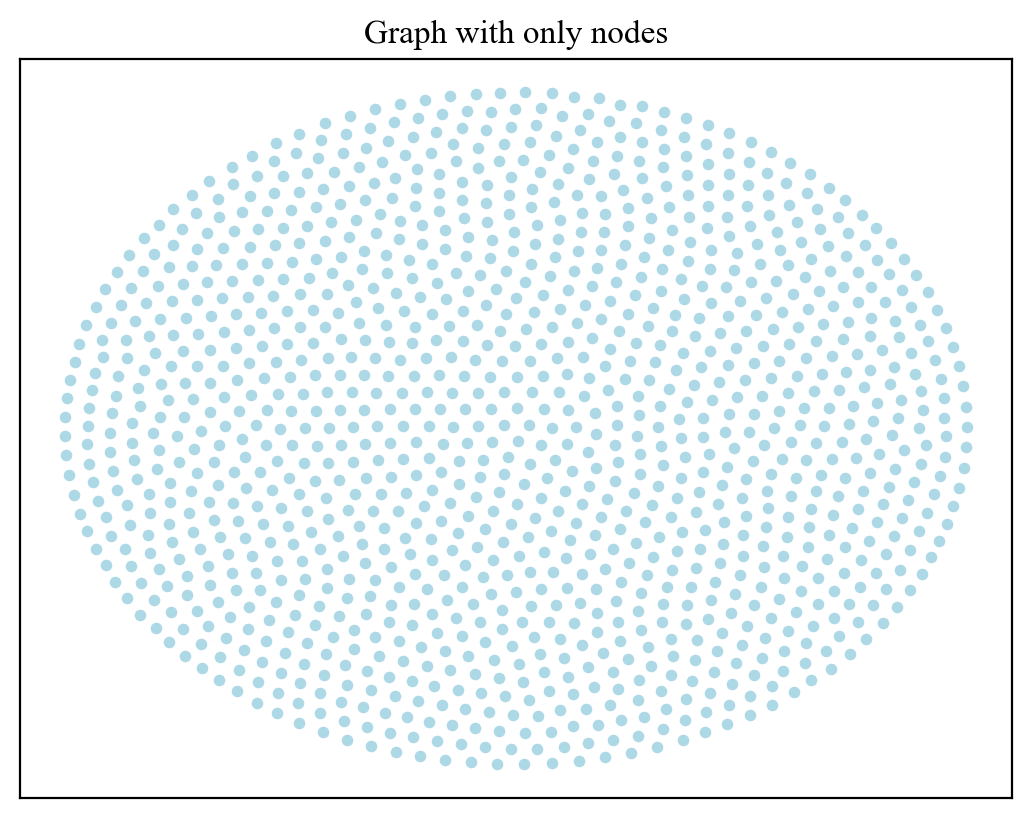

In [66]:
# Plot a graph with only nodes

G = nx.Graph()
G.add_nodes_from(df.Mol_i)

nx.draw_networkx(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=10)

plt.title('Graph with only nodes')
plt.show()

In [56]:
edges = list(zip(df.Mol_i, df.Mol_j_nearest))

G.add_edges_from(edges)

print(G)

Graph with 1237 nodes and 809 edges


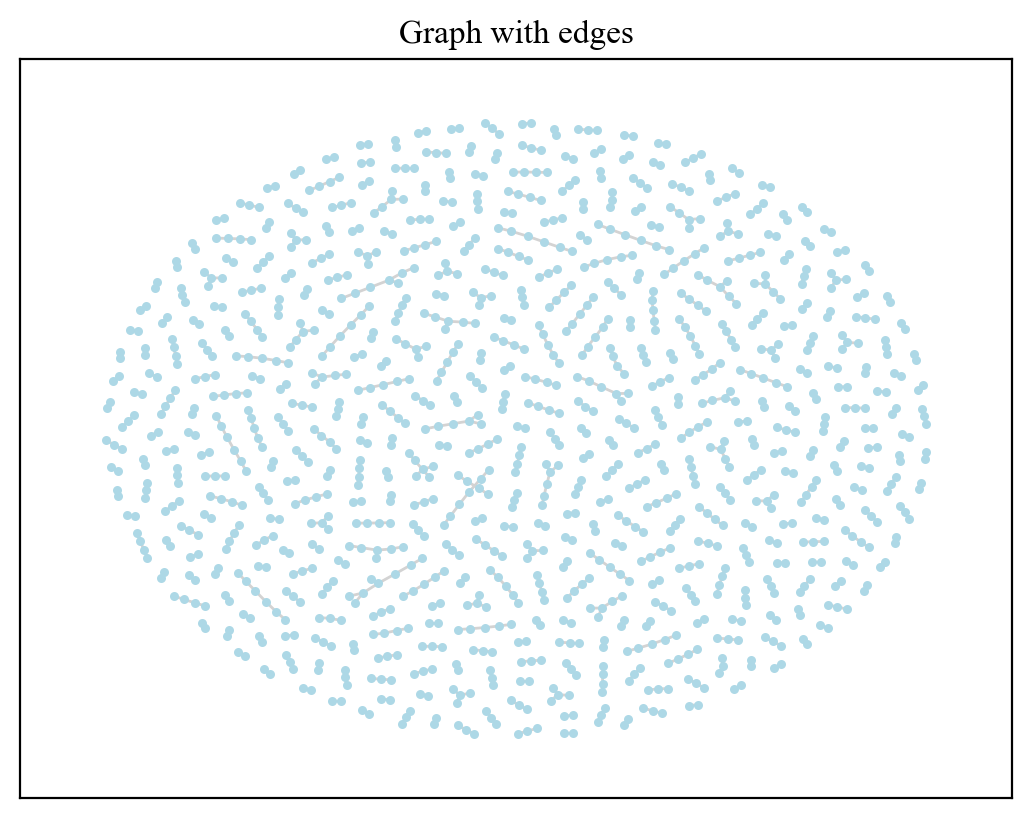

In [62]:
nx.draw_networkx(G, with_labels=False, node_color='lightblue', edge_color='lightgray', node_size=5)

plt.title("Graph with edges")
plt.show()

In [ ]:
G.clear() 

# Create a list of tuples of weighted edges: (mol_i, mol_j, {'value': extracted_value, 'distance': distance_nm})
weighted_edge = [
    (row['Mol_i'], row['Mol_j_nearest'], {
        'value': row['extracted_value'],
        'capacity': row['Distance_nm']
    })
    for _, row in df.iterrows()
]

G.add_edges_from(weighted_edge)